In [2]:
import numpy as np
import matplotlib.pyplot as plt

# genrating dataset

In [2]:

X = 2 * np.random.rand(100,1)
y = 4 + 3* X +np.random.randn(100,1)

## implementing noraml equation

In [3]:

X_b = np.c_[np.ones((100,1)),X] # add x0 = to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.92973047],
       [3.05863489]])

close enough values. Now we can use theta best value to make predictions

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.92973047],
       [10.04700026]])

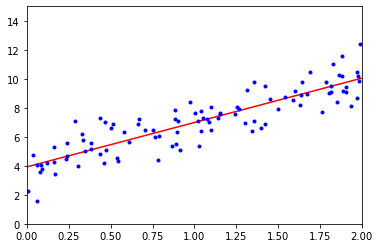

In [9]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

### Let's use sklearn for Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.92973047]), array([[3.05863489]]))

These are same values which we got using normal equation

In [11]:
# another approach for normal equation is using pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[3.92973047],
       [3.05863489]])

## Implementing Batch Gradient Descent
In BGD we calculate gradient descent of each instance and take average of it

In [12]:
eta = 0.1 # learning rate
n_iteration =100
m= 100 # length of data set

theta = np.random.randn(2,1) #random initialization

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [13]:
theta

array([[3.91019905],
       [3.07456389]])

In [17]:
def batch_gradient_descent(X,y,n_iteration=100,eta=0.1):
    m = len(X)
    theta = np.random.randn(np.array(X).shape[1],1)
    
    for iteration in range(n_iteration):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta * gradients
    return theta

In [18]:
batch_gradient_descent(X_b,y)

array([[3.89740891],
       [3.08499499]])

## Implementing Stochastic Gradient Descent
SGD picks a random instance in the training set at every step and computes gradients based only on that single instance. For each epoch in SGD we iterate length of dataset over it and everytime we chose a random index value. Due to its randomness there are chances of repeatation of same instance. 

In [32]:
def learning_schedule(t):
    t0=5
    t1=50
    return t0/(t+t1)
def stochastic_gradient_descent(X,y,n_epoch):
    theta = np.random.randn(np.array(X).shape[1],1)
    m = len(X)
    for epoch in range(n_epoch):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
#             print(xi)
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch*m+i)
            theta = theta - eta*gradients
    return theta

In [33]:
stochastic_gradient_descent(X_b,y,100)

array([[3.95680606],
       [3.04792585]])

# Polynomial Regression
you can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, the train model on this extended set of features. This  technique is called Polynomial regression

In [46]:
m= 100
X = 6* np.random.rand(m,1)-3
y = 0.5 * X**2 + X +2+np.random.randn(m,1)

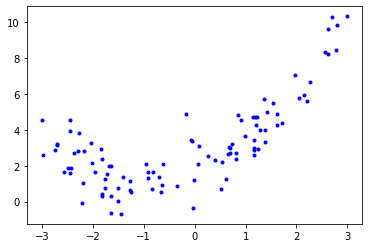

In [47]:
plt.plot(X,y,'b.')

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

(array([1.37642373]), array([1.37642373, 1.89454229]))

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.71288955]), array([[1.1183578 , 0.57269587]]))

In [83]:
X_new = np.arange(-3,5).reshape(-1,1)

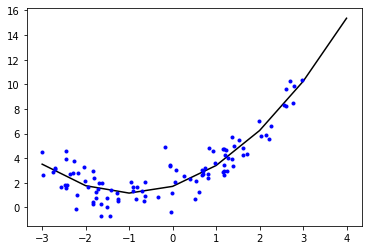

In [84]:
p = lin_reg.predict(poly_features.transform(X_new))
plt.plot(X_new,p,'k-')
plt.plot(X,y,'b.')
plt.show()

## Learning Curves
These are plots of the model's performance on the training ser and the validation ser as a function of the training ser size.To genrate the plots model is trained sevral times on different sized subsets if the training se

In [89]:
m= 100
X = 6* np.random.rand(m,1)-3
y = 0.5 * X**2 + X +2+np.random.randn(m,1)

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# fucntion to plot learning curve
def plot_learning_curve(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')

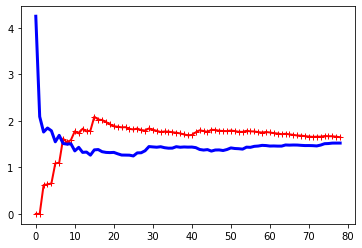

In [91]:
# simple linear regression
lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)

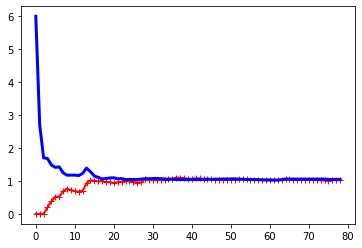

In [92]:
# using polynomial regression
from sklearn.pipeline import Pipeline
poly_reg = Pipeline([
    ('poly_features',PolynomialFeatures(degree=2,include_bias=False)),
    ('lin_reg',LinearRegression())
])
plot_learning_curve(poly_reg,X,y)

# Ridge Regression

In [5]:
m= 100
X = 6* np.random.rand(m,1)-3
y = 0.5 * X**2 + X +2+np.random.randn(m,1)

In [8]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.86292267]])

In [9]:
0.5 * 1.5**2 + 1.5+2+np.random.randn(1,1)

array([[3.31058031]])

# Lasso Regression

In [10]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.81843219])

# Elastic Net

In [11]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.82026241])

# Early Stopping

In [14]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# genrating data
m= 1000
X = 6* np.random.rand(m,1)-3
y = 0.5 * X**2 + X +2+np.random.randn(m,1)

# splitting data
X_train,X_val,y_train,y_val = train_test_split(X,y)
poly_scaler = Pipeline([
('poly_features',PolynomialFeatures(degree=90,include_bias=False)),
('std_scaler',StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg =SGDRegressor(max_iter=1,tol=np.infty,warm_start=True,penalty=None,learning_rate='constant',eta0=0.0005)
# warm start is True than it contunues training model from where it left

minimum_val_error = float('inf')
best_epoch=None
best_model=None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before converge

/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before converge

/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

# Logistic Regression

In [15]:
# logistic regression uses log loss as cost fucntion
# -log(p) if y=1 positive
# -log(1-p) if y=0 negative
# using ireis datset
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [16]:
X = iris['data'][:,3:] # petal width
y = (iris['target']==2).astype(int) # 1 if virginica else 0

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

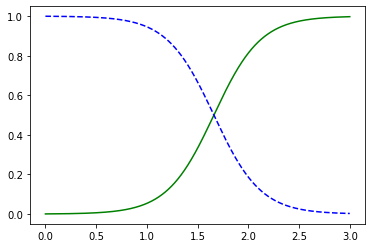

In [18]:
X_new = np.linspace(0,3,3000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-',label='iris virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='not iris virginica')

we observe that petal width less than 1.6 are classified as not virginica, hence probability of not virginica is high there